# Интерпретация. Практическая работа

## Цель практической работы

Научиться интерпретировать модели кластеризации.

## Что входит в практическую работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

## Что оценивается 

* Выполнены все этапы работы.
* Сделаны выводы по результатам разведочного анализа данных.
* Выполнена и обоснована подготовка данных.
* Выбор количества кластеров обоснован и подкреплён визуализацией. 
* Выбор гиперпараметров метода понижения размерности обоснован.
* Интерпретация кластеров подкреплена расчётами и визуализацией. 



# Задача

У вас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Решите задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовьте результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("marketing campaign.csv", index_col='ID')
df.head()

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
ID,,,,,,,,,,
5524,1957,04-09-2012,58,88,546,172,88,8,4,1
2174,1954,08-03-2014,38,1,6,2,1,1,2,0
4141,1965,21-08-2013,26,49,127,111,21,8,10,0
6182,1984,10-02-2014,26,4,20,10,3,2,4,0
5324,1981,19-01-2014,94,43,118,46,27,5,6,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year_Birth         2240 non-null   int64 
 1   Dt_Customer        2240 non-null   object
 2   Recency            2240 non-null   int64 
 3   MntFruits          2240 non-null   int64 
 4   MntMeatProducts    2240 non-null   int64 
 5   MntFishProducts    2240 non-null   int64 
 6   MntSweetProducts   2240 non-null   int64 
 7   NumWebPurchases    2240 non-null   int64 
 8   NumStorePurchases  2240 non-null   int64 
 9   Response           2240 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 192.5+ KB


In [8]:
df.describe()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


In [53]:
df['Dt_Customer'].min()

'01-01-2013'

In [49]:
df['Age'] = 2024 - df['Year_Birth']


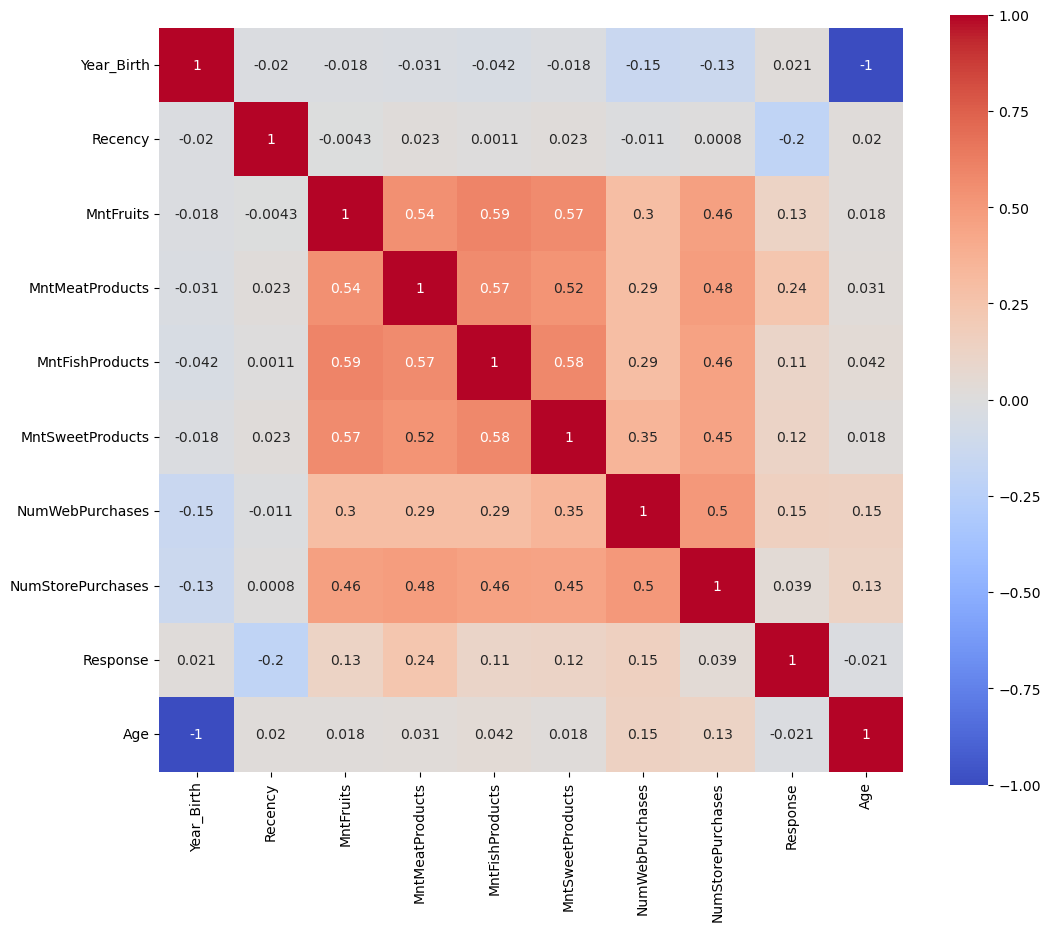

In [68]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

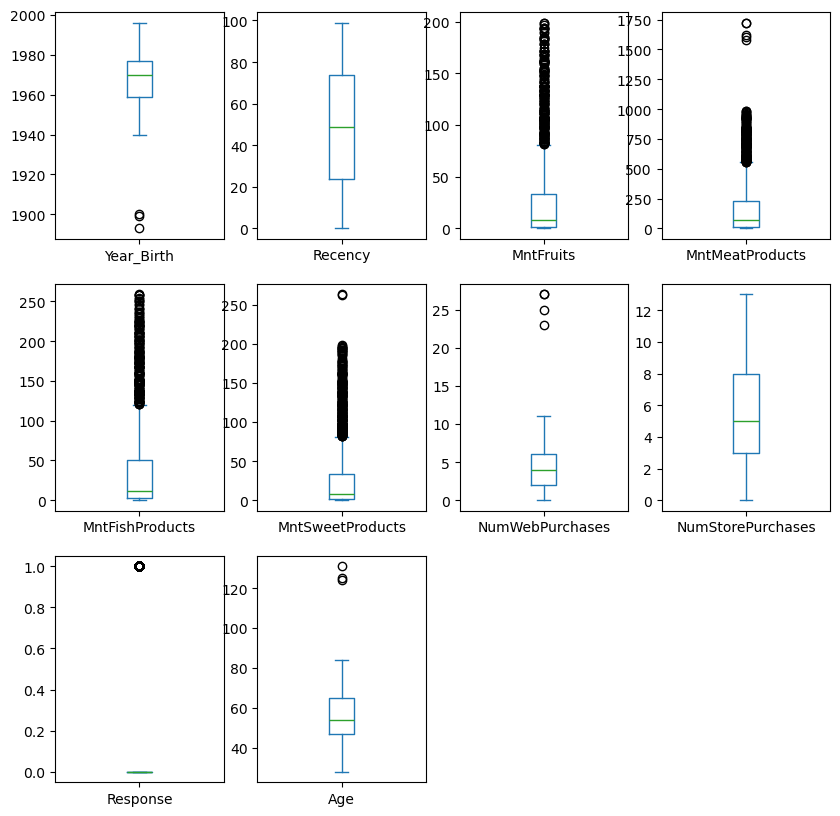

In [48]:
df.plot(kind='box', subplots=True, layout=(3, 4), figsize=(10, 10))
plt.show()


# Задание 2

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположите, какое количество кластеров будет оптимальным, аргументируйте своё предположение.

In [72]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_cluster = list(range(2, 10))
metrics = []


for k in n_cluster:
    data = df.drop(['Year_Birth', 'Dt_Customer'], axis=1)
    km = KMeans(n_clusters=k).fit(data)
    score = silhouette_score(data, km.labels_)
    metrics.append(score)
    

Напишите ваш ответ ниже


<Axes: >

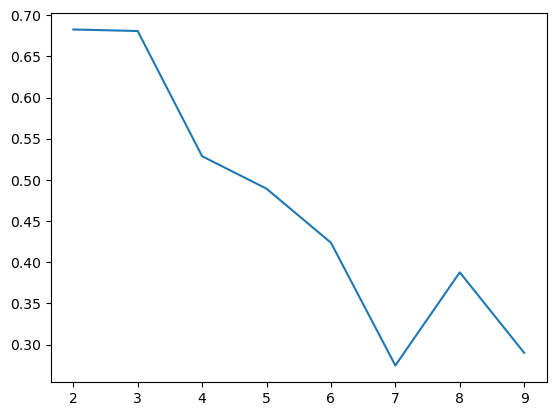

In [73]:
sns.lineplot(x=n_cluster, y=metrics)

In [78]:
best_k = n_cluster[np.argmax(metrics)] + 1

# Задание 3

Выполните очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения. Аргументируйте выбранные шаги подготовки данных. 

In [55]:
df_pred = df.drop(['Year_Birth', 'Dt_Customer'], axis=1).copy() 

# Задание 4

Постройте модель кластеризации с помощью метода k-средних. Определите оптимальное количество кластеров с помощью метода локтя и метрики silhouette score. 

Помните, что аналитический способ определения количества кластеров не является единственно верным. Если ваше понимание предметной области и результаты анализа данных расходятся с результатами метода локтя, вы можете выбрать и обосновать количество кластеров, исходя из своего опыта.

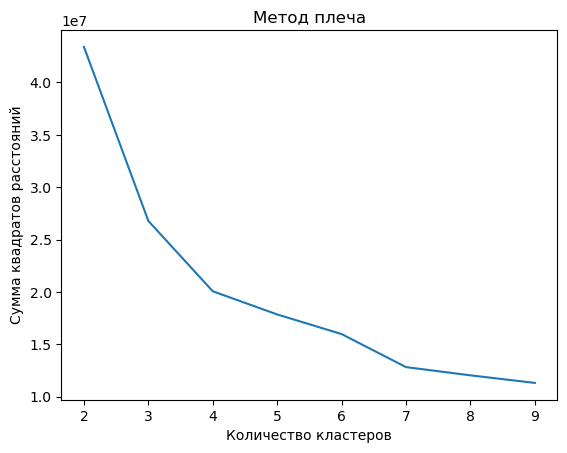

In [75]:
n_cluster = list(range(2, 10))

metrics = []

# Silhouette score

for k in n_cluster:
    km = KMeans(n_clusters=k).fit(df_pred)
    score = silhouette_score(df_pred, km.labels_)
    metrics.append(score)
    
# Плечо
 
distances = []

for k in n_cluster:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pred)
    distances.append(kmeans.inertia_)

# Визуализация графика
plt.plot(n_cluster, distances)
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод плеча')
plt.show()
    

# Задание 5

Визуализируйте результаты кластеризации на двумерном графике с помощью метода t-SNE. Обоснуйте выбранные значения его гиперпараметров.

In [57]:
from sklearn.manifold import TSNE

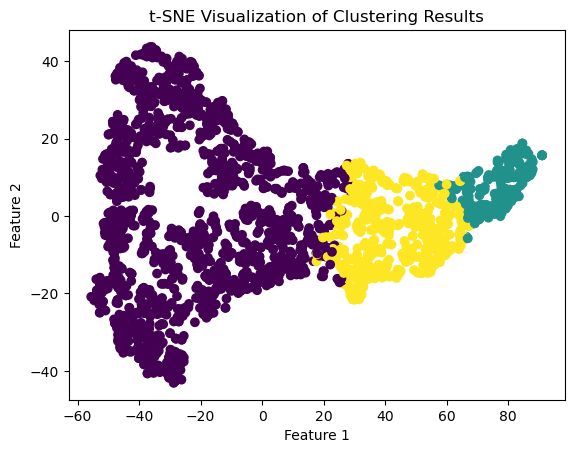

In [96]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pred)
labels = kmeans.labels_

# t-SNE для визуализации результатов кластеризации
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embedded = tsne.fit_transform(df_pred)

# Визуализация результатов кластеризации
plt.scatter(embedded[:, 0], embedded[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization of Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [97]:
df_pred['cluster'] = labels

# Задание 6

Постройте профили кластеров и опишите их.

In [125]:
function = ["mean"]#, 'std']
df_g = df_pred.groupby('cluster').agg(function).T
df_g

,cluster,0,1,2
Recency,mean,49.083172,49.629808,48.968815
MntFruits,mean,10.016119,69.423077,60.170478
MntMeatProducts,mean,46.456480,726.423077,313.550936
MntFishProducts,mean,13.840103,98.697115,87.446985
MntSweetProducts,mean,10.459059,70.942308,61.627859
NumWebPurchases,mean,3.445519,4.937500,5.777547
NumStorePurchases,mean,4.595100,8.134615,8.629938
Response,mean,0.107672,0.389423,0.178794
Age,mean,54.595100,55.086538,57.172557


In [126]:
features = df_pred.columns[:-1]

In [127]:
stat = np.array([[df_pred[feature].apply(f) for f in function] for feature in features]).flatten()
df_g['Global'] = stat
df_g


,cluster,0,1,2,Global
Recency,mean,49.083172,49.629808,48.968815,49.109375
MntFruits,mean,10.016119,69.423077,60.170478,26.302232
MntMeatProducts,mean,46.456480,726.423077,313.550936,166.950000
MntFishProducts,mean,13.840103,98.697115,87.446985,37.525446
MntSweetProducts,mean,10.459059,70.942308,61.627859,27.062946
NumWebPurchases,mean,3.445519,4.937500,5.777547,4.084821
NumStorePurchases,mean,4.595100,8.134615,8.629938,5.790179
Response,mean,0.107672,0.389423,0.178794,0.149107
Age,mean,54.595100,55.086538,57.172557,55.194196


In [128]:
cluster_labels = [i for i in range(3)]
df_g_rel = df_g.copy()
for label in cluster_labels:
    df_g_rel[label] = 100 * df_g_rel[label] / df_g['Global'] - 100


In [129]:
df_g_rel

,cluster,0,1,2,Global
Recency,mean,-0.053356,1.059742,-0.286218,49.109375
MntFruits,mean,-61.919131,163.943670,128.765672,26.302232
MntMeatProducts,mean,-72.173417,335.114152,87.811282,166.950000
MntFishProducts,mean,-63.118085,163.013834,133.033831,37.525446
MntSweetProducts,mean,-61.352846,162.138152,127.720432,27.062946
NumWebPurchases,mean,-15.650682,20.874317,41.439397,4.084821
NumStorePurchases,mean,-20.639754,40.489888,49.044412,5.790179
Response,mean,-27.788524,161.169968,19.909868,0.149107
Age,mean,-1.085434,-0.195053,3.584364,55.194196


# Задание 7

Визуализируйте профили кластеров. Подготовьте краткое резюме результатов вашего исследования для заказчика.

<Axes: xlabel='cluster', ylabel='None-None'>

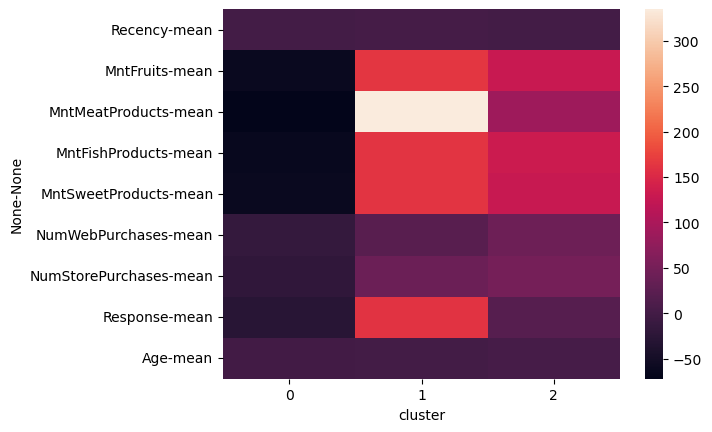

In [130]:
sns.heatmap(df_g_rel[cluster_labels])#, cmap='coolwarm');

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Получилось 3 группы

0. Группа людей, которые тратят  мало денег на все продукты. Большая часть не участвовала в рекламной компании.
1. Группа людей, которая тратят много денег на все продукты, особенно на мясо, потому что количество покупок не отличается от 0 группы, но денег потрачено больше. Большая часть участвовала в рекламной компании.
2. Группа людей, которые тратят среднее количество денег на все продукты, много на сладости и рыбу. Большая часть не участвовала в рекламной компании.

Итог: 0 группа - самая бедная, 1 группа - самая богатая, 2 группа - среднеестатистический покупатель. 

Акцент стоит делать на 1 группа, она покупает самые дорогие продукты и также покупателям из 2 группы предлагать больше сладостей и рыбу.

## Как отправить работу на проверку

Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (.ipynb) или ссылку на него.